# Goal of this Analysis

**1. How many customers do we have each day? Are there any peak hours?**

**2. How many pizzas are typically in order? Fo we have any bestsellers?**

**3. How much money did we make this year? Can we identify any seasonality in the sales?**

**4. Are there any pizzas we should take off the menu, or any promotions we could leverage?**

In [1]:
#Importing useful and essentials libraries

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
#Reading "order detail" file from dataset by using read_csv method

df1 = pd.read_csv("/kaggle/input/pizza-place-sales/order_details.csv")
df1

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1
...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1
48616,48617,21348,four_cheese_l,1
48617,48618,21348,napolitana_s,1
48618,48619,21349,mexicana_l,1


In [3]:
#To read only top 5 records 

df1.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [4]:
#To get details of dataset (like datatype, column name, non - null count etc.)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
#Reading another file name as "pizzas" from the same dataset

df2 = pd.read_csv("/kaggle/input/pizza-place-sales/pizzas.csv")
df2

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [6]:
#To get details of dataset (like datatype, column name, non - null count etc.)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [7]:
#To read only top 5 records 

df2.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [8]:
#Reading 3rd file "pizza types" from dataset by using same method

df3 = pd.read_csv("/kaggle/input/pizza-place-sales/pizza_types.csv", encoding='unicode_escape')
df3

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [9]:
#To get details of dataset (like datatype, column name, non - null count etc.)

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [10]:
#To read only top 5 records 

df3.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [11]:
#Reading "orders" file from the same dataset by using same method

df4 = pd.read_csv("/kaggle/input/pizza-place-sales/orders.csv")
df4

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30
...,...,...,...
21345,21346,2015-12-31,20:51:07
21346,21347,2015-12-31,21:14:37
21347,21348,2015-12-31,21:23:10
21348,21349,2015-12-31,22:09:54


In [12]:
#Combining order details and orders dataframe 
#Then using head just to see only top 5 records 

combine_df1 = df1.merge(df1, how = 'inner', on = ['order_id'])
combine_df1.head()

,order_details_id_x,order_id,pizza_id_x,quantity_x,order_details_id_y,pizza_id_y,quantity_y
0,1,1,hawaiian_m,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1,2,classic_dlx_m,1
2,2,2,classic_dlx_m,1,3,five_cheese_l,1
3,2,2,classic_dlx_m,1,4,ital_supr_l,1
4,2,2,classic_dlx_m,1,5,mexicana_m,1


In [13]:
#Getting info of combine_df

combine_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172836 entries, 0 to 172835
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   order_details_id_x  172836 non-null  int64 
 1   order_id            172836 non-null  int64 
 2   pizza_id_x          172836 non-null  object
 3   quantity_x          172836 non-null  int64 
 4   order_details_id_y  172836 non-null  int64 
 5   pizza_id_y          172836 non-null  object
 6   quantity_y          172836 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 9.2+ MB


In [14]:
#Creating combine_df2; combining df2 and df3

combine_df2 = df2.merge(df3, how = "inner", on = ["pizza_type_id"])
combine_df2

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
...,...,...,...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
92,spinach_fet_l,spinach_fet,L,20.25,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
93,veggie_veg_s,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
94,veggie_veg_m,veggie_veg,M,16.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


In [15]:
#To get info 

combine_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
 4   name           96 non-null     object 
 5   category       96 non-null     object 
 6   ingredients    96 non-null     object 
dtypes: float64(1), object(6)
memory usage: 5.4+ KB


In [16]:
#Creating combine_df3; combining df1 and df2

combine_df3 = df1.merge(df2, how = "inner", on = ["pizza_id"])
combine_df3  

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
1,179,77,hawaiian_m,1,hawaiian,M,13.25
2,357,146,hawaiian_m,1,hawaiian,M,13.25
3,389,163,hawaiian_m,1,hawaiian,M,13.25
4,568,247,hawaiian_m,1,hawaiian,M,13.25
...,...,...,...,...,...,...,...
48615,39733,17492,the_greek_xxl,1,the_greek,XXL,35.95
48616,41183,18139,the_greek_xxl,1,the_greek,XXL,35.95
48617,42718,18789,the_greek_xxl,1,the_greek,XXL,35.95
48618,43041,18919,the_greek_xxl,1,the_greek,XXL,35.95


In [17]:
#To get info 

combine_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   pizza_type_id     48620 non-null  object 
 5   size              48620 non-null  object 
 6   price             48620 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 2.6+ MB


In [18]:
#Creating final_df2

final_df2 = combine_df3.sort_values(by = ["order_details_id"])
final_df2

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price
0,1,1,hawaiian_m,1,hawaiian,M,13.25
473,2,2,classic_dlx_m,1,classic_dlx,M,16.00
1632,3,2,five_cheese_l,1,five_cheese,L,18.50
2991,4,2,ital_supr_l,1,ital_supr,L,20.75
3726,5,2,mexicana_m,1,mexicana,M,16.00
...,...,...,...,...,...,...,...
33849,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75
22025,48617,21348,four_cheese_l,1,four_cheese,L,17.95
22493,48618,21348,napolitana_s,1,napolitana,S,12.00
13174,48619,21349,mexicana_l,1,mexicana,L,20.25


In [19]:
#Setting order_details_id as index

final_df2.set_index(['order_details_id'])

,order_id,pizza_id,quantity,pizza_type_id,size,price
order_details_id,,,,,,
1,1,hawaiian_m,1,hawaiian,M,13.25
2,2,classic_dlx_m,1,classic_dlx,M,16.00
3,2,five_cheese_l,1,five_cheese,L,18.50
4,2,ital_supr_l,1,ital_supr,L,20.75
5,2,mexicana_m,1,mexicana,M,16.00
...,...,...,...,...,...,...
48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75
48617,21348,four_cheese_l,1,four_cheese,L,17.95
48618,21348,napolitana_s,1,napolitana,S,12.00


In [20]:
#To get count of size of pizzas

final_df2['size'].value_counts()

size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

In [21]:
pizza_sales = final_df2.groupby(['pizza_id'])['price'].sum().sort_values(ascending = False)
pizza_sales

pizza_id
thai_ckn_l        28323.75
five_cheese_l     25141.50
four_cheese_l     22850.35
spicy_ital_l      22576.00
big_meat_s        21732.00
                    ...   
mexicana_s         1920.00
green_garden_l     1903.50
ckn_alfredo_s      1224.00
calabrese_s        1212.75
the_greek_xxl      1006.60
Name: price, Length: 91, dtype: float64

In [22]:
df4['hour'] = pd.to_datetime(df4['time'], infer_datetime_format=True).dt.hour
df4.info()

/tmp/ipykernel_18/3347663007.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df4['hour'] = pd.to_datetime(df4['time'], infer_datetime_format=True).dt.hour
/tmp/ipykernel_18/3347663007.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df4['hour'] = pd.to_datetime(df4['time'], infer_datetime_format=True).dt.hour


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
 3   hour      21350 non-null  int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 583.9+ KB


In [23]:
df4['Months'] = pd.to_datetime(df4['date'], infer_datetime_format = True).dt.month
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
 3   hour      21350 non-null  int32 
 4   Months    21350 non-null  int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 667.3+ KB


/tmp/ipykernel_18/1168305652.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df4['Months'] = pd.to_datetime(df4['date'], infer_datetime_format = True).dt.month


# 1. How many customers do we have each day? Are there any peak hours?

In [24]:
#By this we can see the no. of customers on each day 

sales_times = df4['date'].value_counts()
sales_times

date
2015-11-27    115
2015-11-26    113
2015-10-15    107
2015-07-04    105
2015-05-15     94
             ... 
2015-03-22     37
2015-02-22     37
2015-12-27     35
2015-12-30     32
2015-12-29     27
Name: count, Length: 358, dtype: int64

In [25]:
sales_average = df4['date'].value_counts().mean()
sales_average

59.63687150837989

In [26]:
#To find the peak hours

sales_hours = df4['hour'].value_counts().sort_values(ascending=False)
sales_hours

hour
12    2520
13    2455
18    2399
17    2336
19    2009
16    1920
20    1642
14    1472
15    1468
11    1231
21    1198
22     663
23      28
10       8
9        1
Name: count, dtype: int64

Text(0.5, 1.0, 'Peak Time Chart')

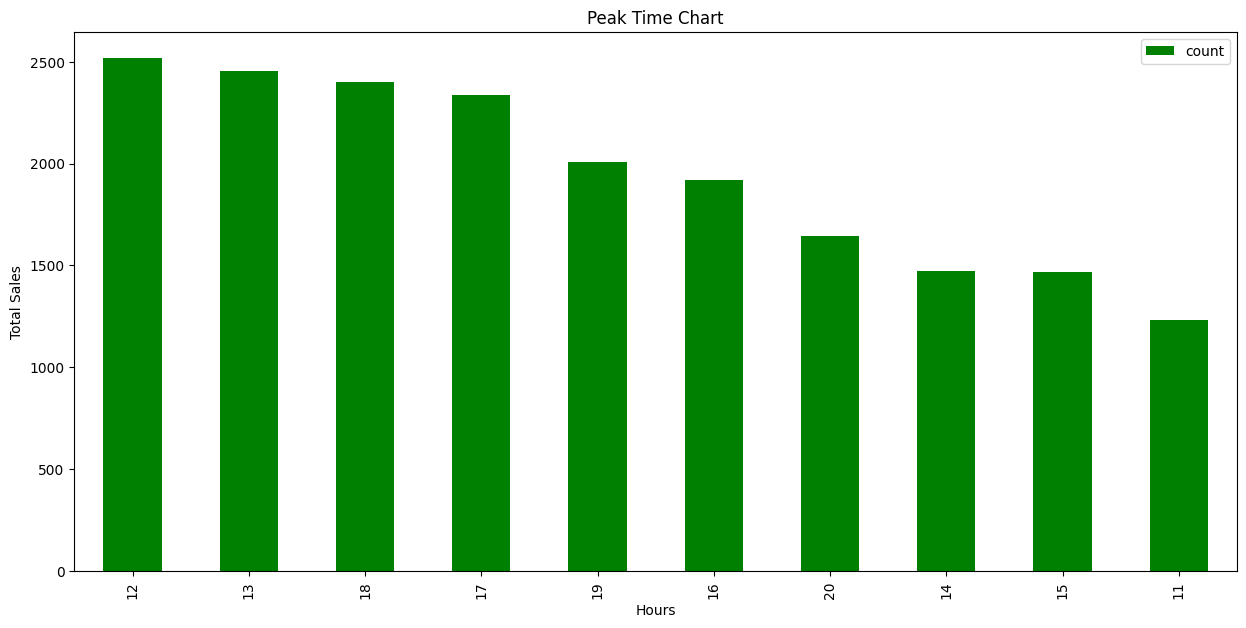

In [27]:
sales_hours.head(10).to_frame().plot(kind='bar',color='green',figsize=(15,7))
plt.xlabel('Hours')
plt.ylabel('Total Sales')
plt.title('Peak Time Chart')

Hence, from above graph it can be said that the peak hours are 12 PM to 1 PM.

# 2. How many pizzas are typically in order? Do we have any bestsellers?

In [28]:
avg_pizzas_per_order = final_df2.groupby('order_id')['pizza_id'].nunique().mean()
print(f"Average pizzas per order: {avg_pizzas_per_order}")

Average pizzas per order: 2.2772833723653396


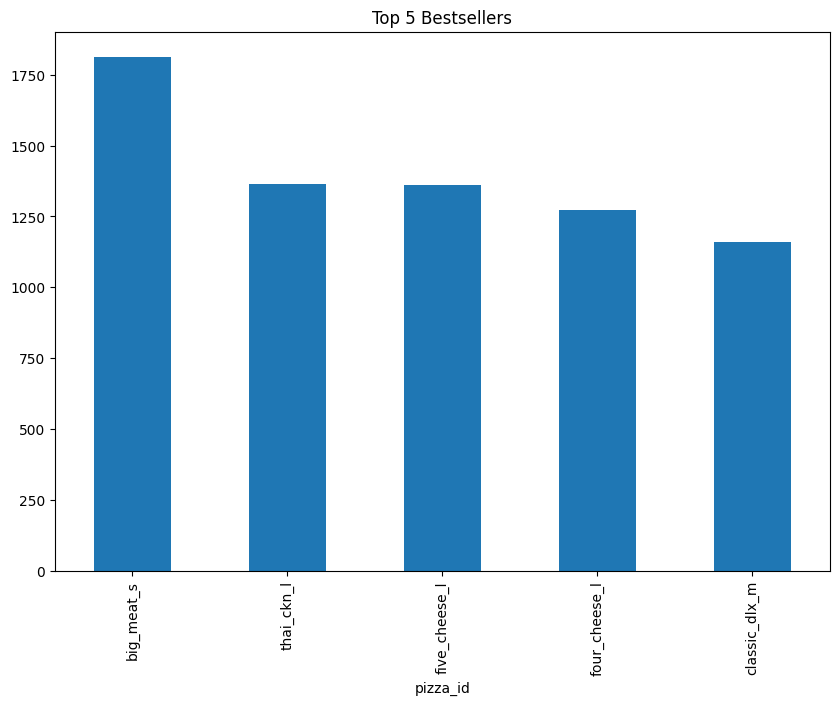

In [29]:
bestsellers = final_df2['pizza_id'].value_counts().head(5)
plt.figure(figsize=(10,7))
bestsellers.plot(kind='bar', title='Top 5 Bestsellers')
plt.show()

Average number of pizzas per order is 2.2772833723653396. And graph is showing the data for top 5 best sellers.

# 3. How much money did we make this year? Can we identify any seasonality in the sales?

In [30]:
final_df2['price'].sum()

801944.7000000001

In [31]:
df4['date'].value_counts().sort_values(ascending=False)

date
2015-11-27    115
2015-11-26    113
2015-10-15    107
2015-07-04    105
2015-05-15     94
             ... 
2015-03-22     37
2015-02-22     37
2015-12-27     35
2015-12-30     32
2015-12-29     27
Name: count, Length: 358, dtype: int64

In [32]:
df4['Months'].value_counts().sort_values(ascending=False)

Months
7     1935
5     1853
1     1845
8     1841
3     1840
4     1799
11    1792
6     1773
2     1685
12    1680
9     1661
10    1646
Name: count, dtype: int64

Text(0.5, 1.0, 'No. of pizzas sold per Month')

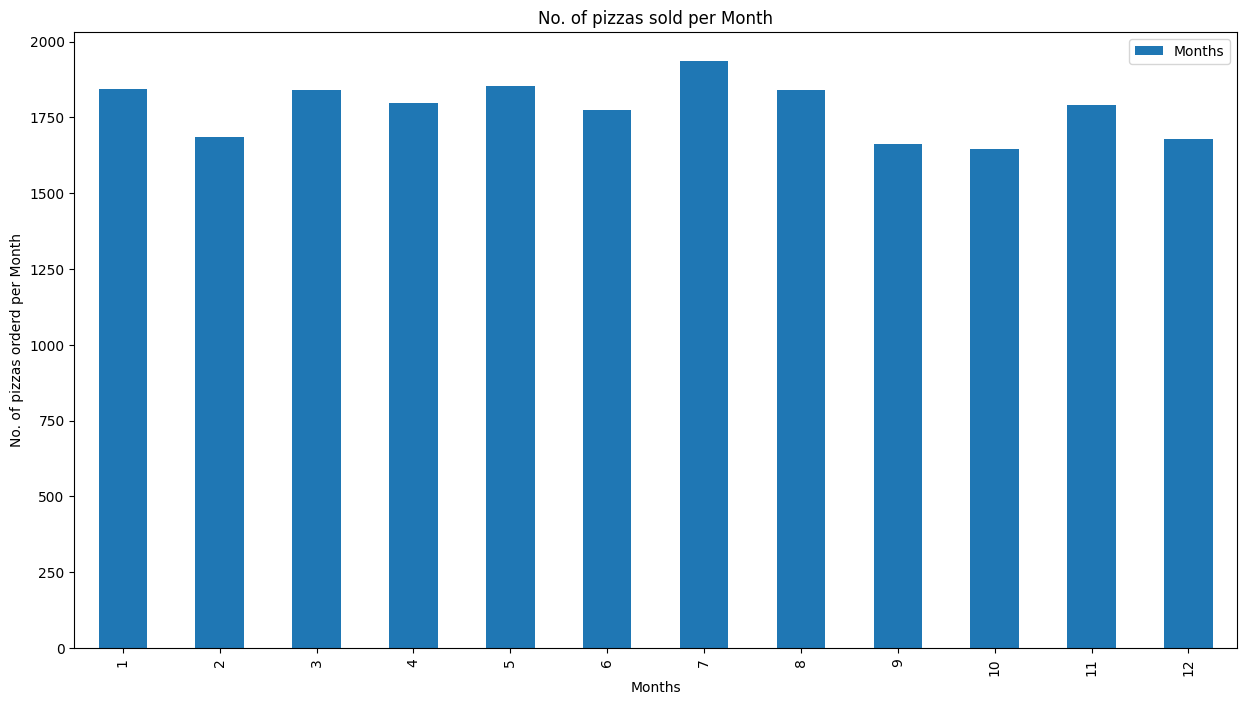

In [33]:
df4.groupby('Months').agg('Months').count().to_frame().plot(kind='bar',figsize=(15,8))
plt.ylabel('No. of pizzas orderd per Month')
plt.title('No. of pizzas sold per Month')

We made total money of 801944.70. And yes we can identify the seasonality sales as we can see that in month of July, highest number of pizza being sold.

# 4. Are there any pizzas we should take off the menu, or any promotions we could leverage?

In [34]:
pizza_popularity = final_df2['pizza_id'].value_counts().tail(5)
pizza_popularity

pizza_id
mexicana_s        160
calabrese_s        99
ckn_alfredo_s      96
green_garden_l     94
the_greek_xxl      28
Name: count, dtype: int64

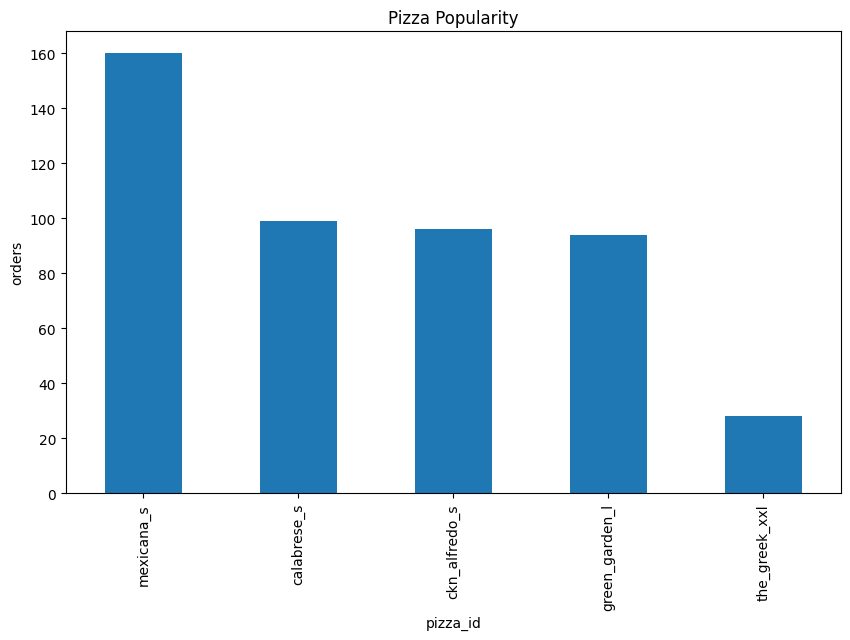

In [35]:
plt.figure(figsize=(10,6))
pizza_popularity.plot(kind='bar', title='Pizza Popularity')
plt.ylabel('orders')
plt.show()

This above chart shows the least popular pizzas. Either these should be removed from our menu or we may go for promotional offers.